In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import hashlib
from datetime import datetime

from hops import hdfs

import hsfs

# Create a connection
connection = hsfs.connection()

# Get the feature store handle for the project's feature store
fs = connection.get_feature_store()

2022-05-30 08:15:58,788 INFO: generated new fontManager
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
df = pd.read_csv(hdfs.project_path() + "Resources/rides.csv", index_col=0)

In [3]:
df = df.drop(columns=["is_start"])

## 16) Update a feature group.

#### Firstly lets create a small FG

In [4]:
df.columns

Index(['ride_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'taxi_id', 'driver_id'],
      dtype='object')

In [5]:
df16 = df.iloc[:10000, :5]
df16_to_be_added_rows = df.iloc[10000:20000, :5]
df16_to_be_added_cols = df.iloc[:20000, 5:] 

In [6]:
df16

,ride_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
0,1228,1577904560000,0,-73.867676,40.759323
1,527,1577890540000,0,-73.857086,40.772793
2,394,1577887880000,0,-73.844320,40.789043
3,1366,1577907320000,0,-73.860565,40.768370
4,1085,1577901700000,0,-73.831210,40.805737
...,...,...,...,...,...
9995,10940,1578098800000,0,-73.910680,40.704590
9996,10359,1578087180000,0,-73.858990,40.770374
9997,10053,1578081060000,0,-73.822105,40.817326
9998,10187,1578083740000,0,-73.805600,40.838326


In [7]:
df16_to_be_added_rows

,ride_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
10000,11197,1578103940000,0,-73.961130,40.640380
10001,10686,1578093720000,0,-73.922360,40.689720
10002,10353,1578087060000,0,-73.945854,40.659830
10003,10966,1578099320000,0,-73.954370,40.648990
10004,10958,1578099160000,0,-73.949730,40.654892
...,...,...,...,...,...
19995,20584,1578291680000,0,-73.833130,40.803288
19996,20934,1578298680000,0,-73.799900,40.845580
19997,20140,1578282800000,0,-73.877080,40.747353
19998,19710,1578274200000,0,-73.784830,40.864760


In [28]:
df.pickup_datetime.min()

'1577880020000'

In [29]:
df.pickup_datetime.max()

'1578701560000'

In [42]:
df16.shape

(10000, 5)

In [10]:
import hsfs
connection = hsfs.connection()
fs = connection.get_feature_store(name='testing_featurestore')
fg = fs.get_feature_group('test16_fg', version=1)

Connected. Call `.close()` to terminate connection gracefully.


In [43]:
test16_fg = fs.create_feature_group(name="test16_fg",
                                   version=1,
                                   primary_key=["ride_id"],   
                                   description="test16_fg")   
test16_fg.save(df16)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test16_fg_2_offline_fg_backfill/executions


#### Now lets try to insert a new data in different dimensions

New rows

In [33]:
test16_fg.insert(df16_to_be_added_rows)

New columns

In [46]:
df16_to_be_added_cols["ride_id"] = df.loc[:20000, "ride_id"]

In [8]:
df16_to_be_added_cols

,dropoff_longitude,dropoff_latitude,passenger_count,taxi_id,driver_id
0,-73.864080,40.763897,3,2013000194,2013000194
1,-73.807335,40.836117,3,2013000122,2013000122
2,-73.765950,40.888790,3,2013000102,2013000102
3,-73.819430,40.820730,3,2013000059,2013000059
4,-73.782560,40.867650,3,2013000064,2013000064
...,...,...,...,...,...
19995,-73.847210,40.785366,3,2013000022,2013000022
19996,-73.862840,40.765480,3,2013000040,2013000040
19997,-73.855290,40.775085,2,2013000190,2013000190
19998,-73.905590,40.711067,3,2013000084,2013000084


In [17]:
fg.insert(df16_to_be_added_cols)

KeyError: 'ride_id'

In [31]:
import hsfs
connection = hsfs.connection()
fs = connection.get_feature_store(name='testing_featurestore')
test16_fg = fs.get_feature_group('test16_fg', version=1)

Connected. Call `.close()` to terminate connection gracefully.


In [34]:
df_from_fg = test16_fg.read(dataframe_type="pandas")

2022-05-29 20:50:32,076 INFO: USE `testing_featurestore`
2022-05-29 20:50:32,893 INFO: SELECT `fg0`.`ride_id` `ride_id`, `fg0`.`pickup_datetime` `pickup_datetime`, `fg0`.`dropoff_datetime` `dropoff_datetime`, `fg0`.`pickup_longitude` `pickup_longitude`, `fg0`.`pickup_latitude` `pickup_latitude`
FROM `testing_featurestore`.`test16_fg_1` `fg0`


In [35]:
df_from_fg

,ride_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
0,8518,None,None,None,None
1,7091,None,None,None,None
2,5129,None,None,None,None
3,6443,None,None,None,None
4,6231,None,None,None,None
...,...,...,...,...,...
19995,12294,None,None,None,None
19996,12297,None,None,None,None
19997,12296,None,None,None,None
19998,12299,None,None,None,None


In [14]:
df16_to_be_added_cols

,dropoff_longitude,dropoff_latitude,passenger_count,taxi_id,driver_id
0,-73.864080,40.763897,3,2013000194,2013000194
1,-73.807335,40.836117,3,2013000122,2013000122
2,-73.765950,40.888790,3,2013000102,2013000102
3,-73.819430,40.820730,3,2013000059,2013000059
4,-73.782560,40.867650,3,2013000064,2013000064
...,...,...,...,...,...
19995,-73.847210,40.785366,3,2013000022,2013000022
19996,-73.862840,40.765480,3,2013000040,2013000040
19997,-73.855290,40.775085,2,2013000190,2013000190
19998,-73.905590,40.711067,3,2013000084,2013000084


In [20]:
fg.insert(df16_to_be_added_cols)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test16_fg_1_offline_fg_backfill/executions


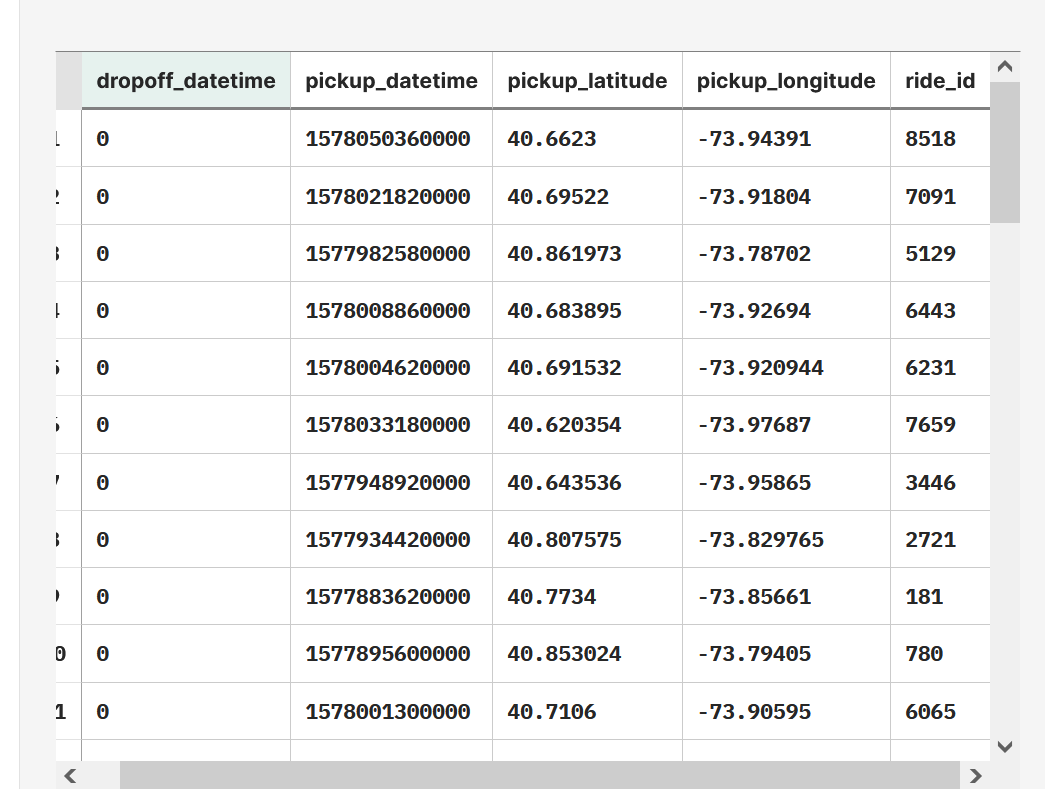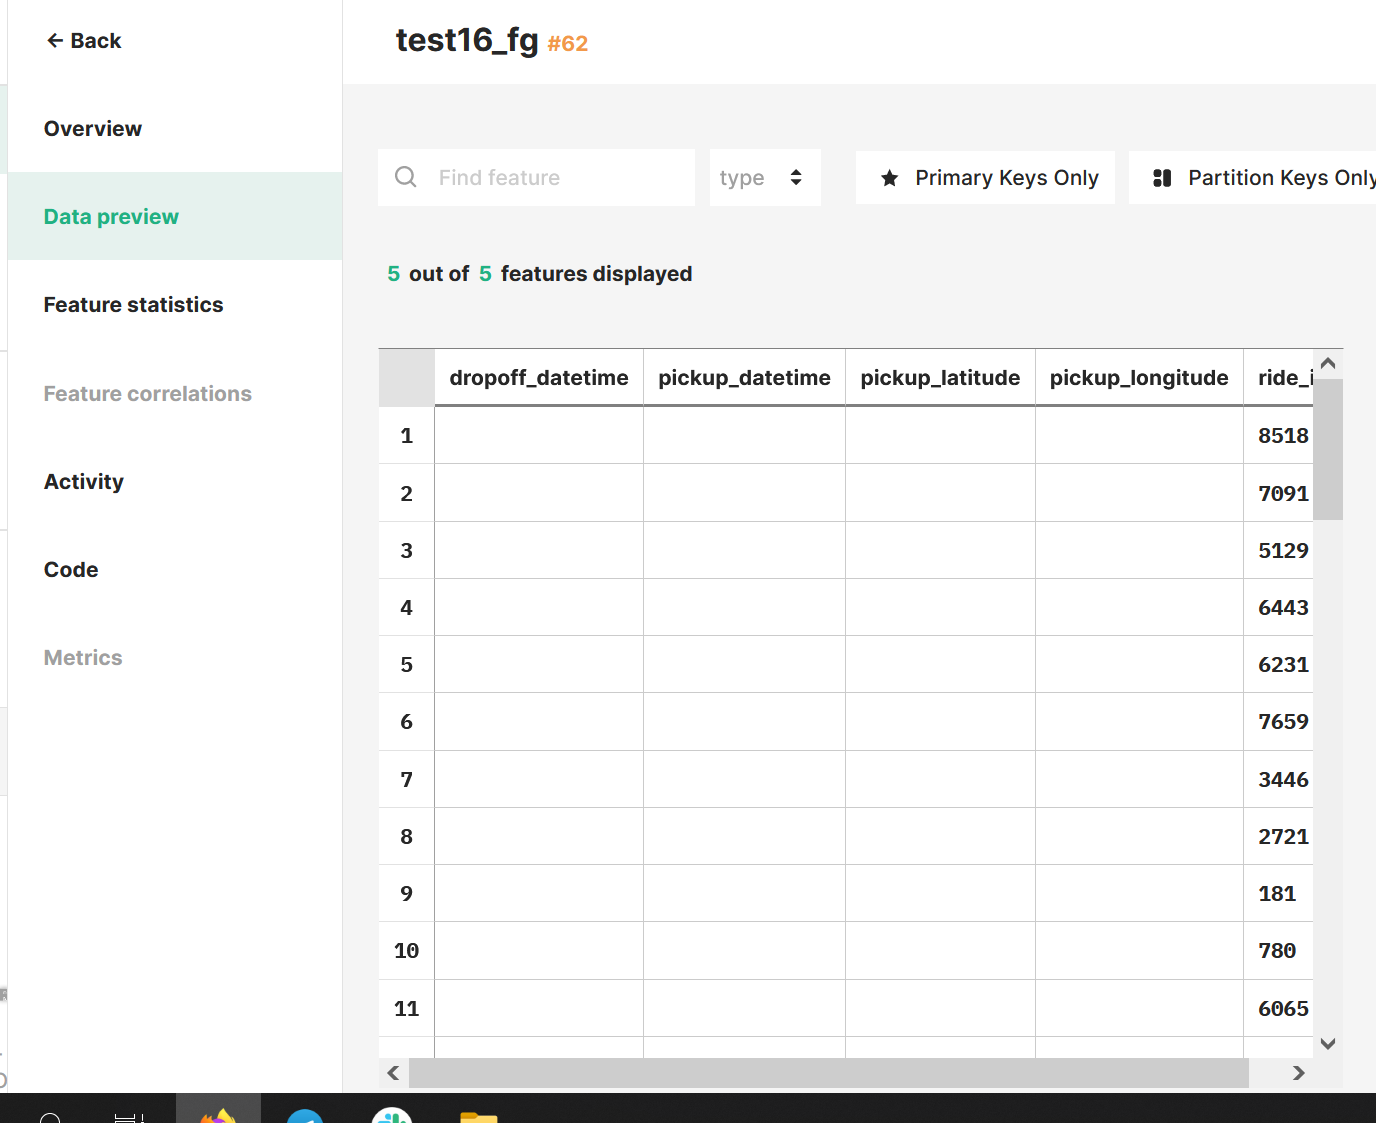

In [21]:
df16_to_be_added_cols

,dropoff_longitude,dropoff_latitude,passenger_count,taxi_id,driver_id,ride_id
0,-73.864080,40.763897,3,2013000194,2013000194,1228
1,-73.807335,40.836117,3,2013000122,2013000122,527
2,-73.765950,40.888790,3,2013000102,2013000102,394
3,-73.819430,40.820730,3,2013000059,2013000059,1366
4,-73.782560,40.867650,3,2013000064,2013000064,1085
...,...,...,...,...,...,...
19995,-73.847210,40.785366,3,2013000022,2013000022,20584
19996,-73.862840,40.765480,3,2013000040,2013000040,20934
19997,-73.855290,40.775085,2,2013000190,2013000190,20140
19998,-73.905590,40.711067,3,2013000084,2013000084,19710


I will try to redo it using another method.

Firstly I will make another version of this fg (like it was before columns inserting)

In [ ]:
test16_fg = fs.create_feature_group(name="test16_fg",
                                   version=2,
                                   primary_key=["ride_id"],   
                                   description="test16_fg")   
test16_fg.save(df16)

In [48]:
test16_fg.insert(df16_to_be_added_rows)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test16_fg_2_offline_fg_backfill/executions


In [2]:
import hsfs
connection = hsfs.connection()
fs = connection.get_feature_store(name='testing_featurestore')
test16_fg = fs.get_feature_group('test16_fg', version=2)

df_from_fg = test16_fg.read(dataframe_type="pandas")

Connected. Call `.close()` to terminate connection gracefully.

In [50]:
df_from_fg

,ride_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
0,8518,1578050360000,0,-73.943910,40.662300
1,7091,1578021820000,0,-73.918040,40.695220
2,5129,1577982580000,0,-73.787020,40.861973
3,6443,1578008860000,0,-73.926940,40.683895
4,6231,1578004620000,0,-73.920944,40.691532
...,...,...,...,...,...
19995,12294,1578125880000,0,-73.881490,40.741734
19996,12297,1578125940000,0,-73.916565,40.697098
19997,12296,1578125920000,0,-73.885025,40.737240
19998,12299,1578125980000,0,-73.896300,40.722893


In [58]:
df16_to_be_added_cols

,dropoff_longitude,dropoff_latitude,passenger_count,taxi_id,driver_id
0,-73.864080,40.763897,3,2013000194,2013000194
1,-73.807335,40.836117,3,2013000122,2013000122
2,-73.765950,40.888790,3,2013000102,2013000102
3,-73.819430,40.820730,3,2013000059,2013000059
4,-73.782560,40.867650,3,2013000064,2013000064
...,...,...,...,...,...
19995,-73.847210,40.785366,3,2013000022,2013000022
19996,-73.862840,40.765480,3,2013000040,2013000040
19997,-73.855290,40.775085,2,2013000190,2013000190
19998,-73.905590,40.711067,3,2013000084,2013000084


In [60]:
metadata = test16_fg.append_features(list(df16_to_be_added_cols.columns))

TypeError: The argument `features` has to be of type `Feature` or a list thereof, but an element is of type: `<class 'list'>`

### I will try PySpark engine.

An error was encountered:
'DataFrame' object has no attribute 'show'
Traceback (most recent call last):
  File "/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/pandas/core/generic.py", line 5487, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'show'



In [12]:
df16_to_be_added_cols["ride_id"] = df.loc[:20000, "ride_id"]

In [14]:
test16_fg.insert(df16_to_be_added_cols)

An error was encountered:
Error writing to offline and online feature store
Traceback (most recent call last):
  File "/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/hsfs/feature_group.py", line 947, in insert
    self._feature_group_engine.insert(
  File "/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/hsfs/core/feature_group_engine.py", line 105, in insert
    return engine.get_instance().save_dataframe(
  File "/srv/hops/anaconda/envs/theenv/lib/python3.8/site-packages/hsfs/engine/spark.py", line 199, in save_dataframe
    raise FeatureStoreException(
hsfs.client.exceptions.FeatureStoreException: Error writing to offline and online feature store



## 17) Delete feature group column (must fail).

In [4]:
import hsfs
connection = hsfs.connection()
fs = connection.get_feature_store(name='testing_featurestore')
test16_fg = fs.get_feature_group('test16_fg', version=2)

Connected. Call `.close()` to terminate connection gracefully.


In [5]:
df_from_fg = test16_fg.read(dataframe_type="pandas")

2022-05-29 21:34:15,399 INFO: USE `testing_featurestore`
2022-05-29 21:34:16,295 INFO: SELECT `fg0`.`ride_id` `ride_id`, `fg0`.`pickup_datetime` `pickup_datetime`, `fg0`.`dropoff_datetime` `dropoff_datetime`, `fg0`.`pickup_longitude` `pickup_longitude`, `fg0`.`pickup_latitude` `pickup_latitude`
FROM `testing_featurestore`.`test16_fg_2` `fg0`


In [6]:
df17_to_be_added_rows = df.iloc[:20000, :4]

Here I try to overwrite all rows with smaller amount of columns.
This FG had 20000 rows and 5 columns, now I am trying to rewrite it using 20000 rows and 4 columns.

In [9]:
test16_fg.insert(df17_to_be_added_rows, overwrite=True)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test16_fg_2_offline_fg_backfill/executions


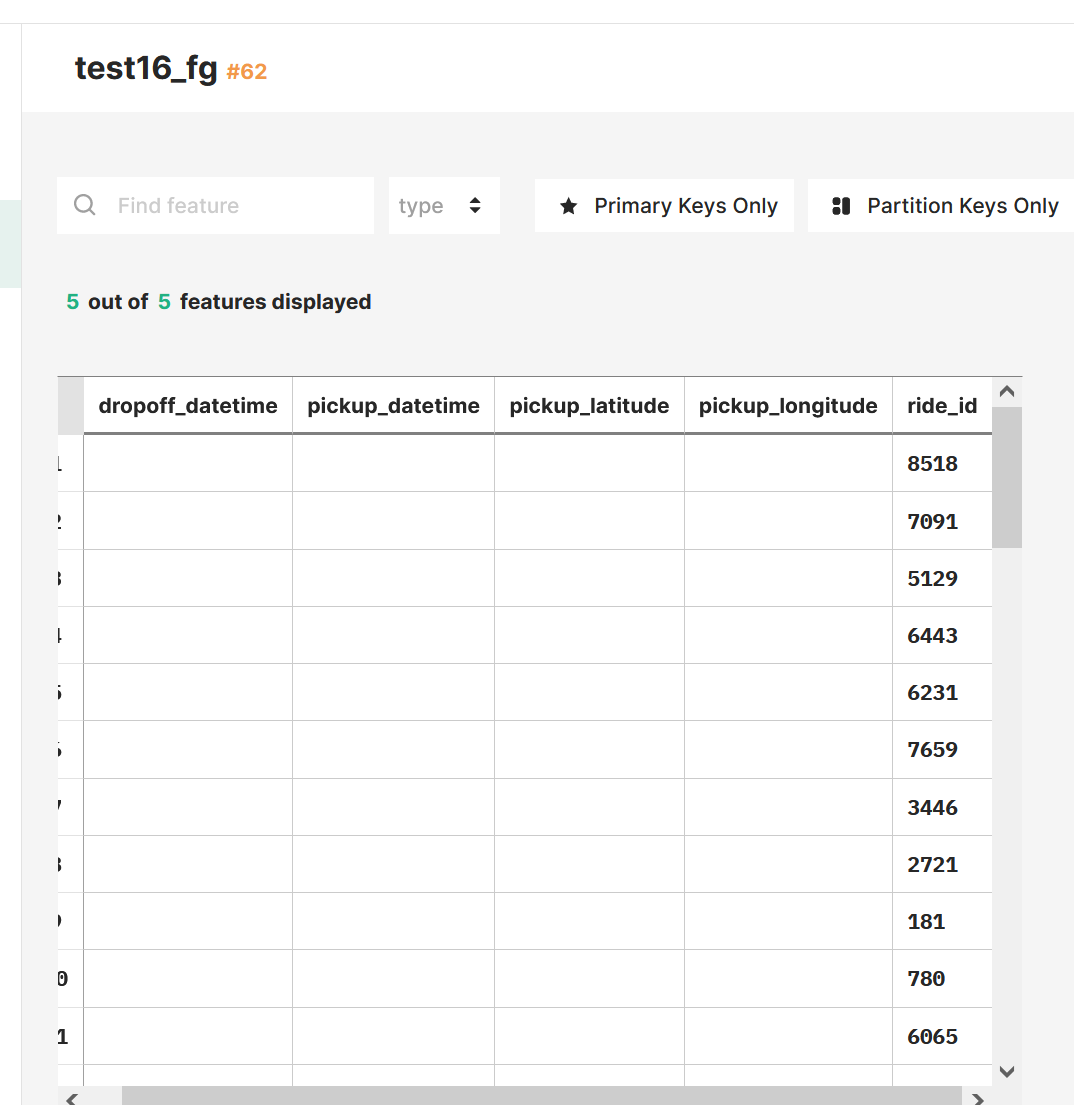


## 18) Delete feature group.

In [16]:
test18_fg = fs.create_feature_group(name="test18_fg",
                                   version=1,
                                   primary_key=["ride_id"],   
                                   description="test18_fg")   
test18_fg.save(df)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test18_fg_1_offline_fg_backfill/executions


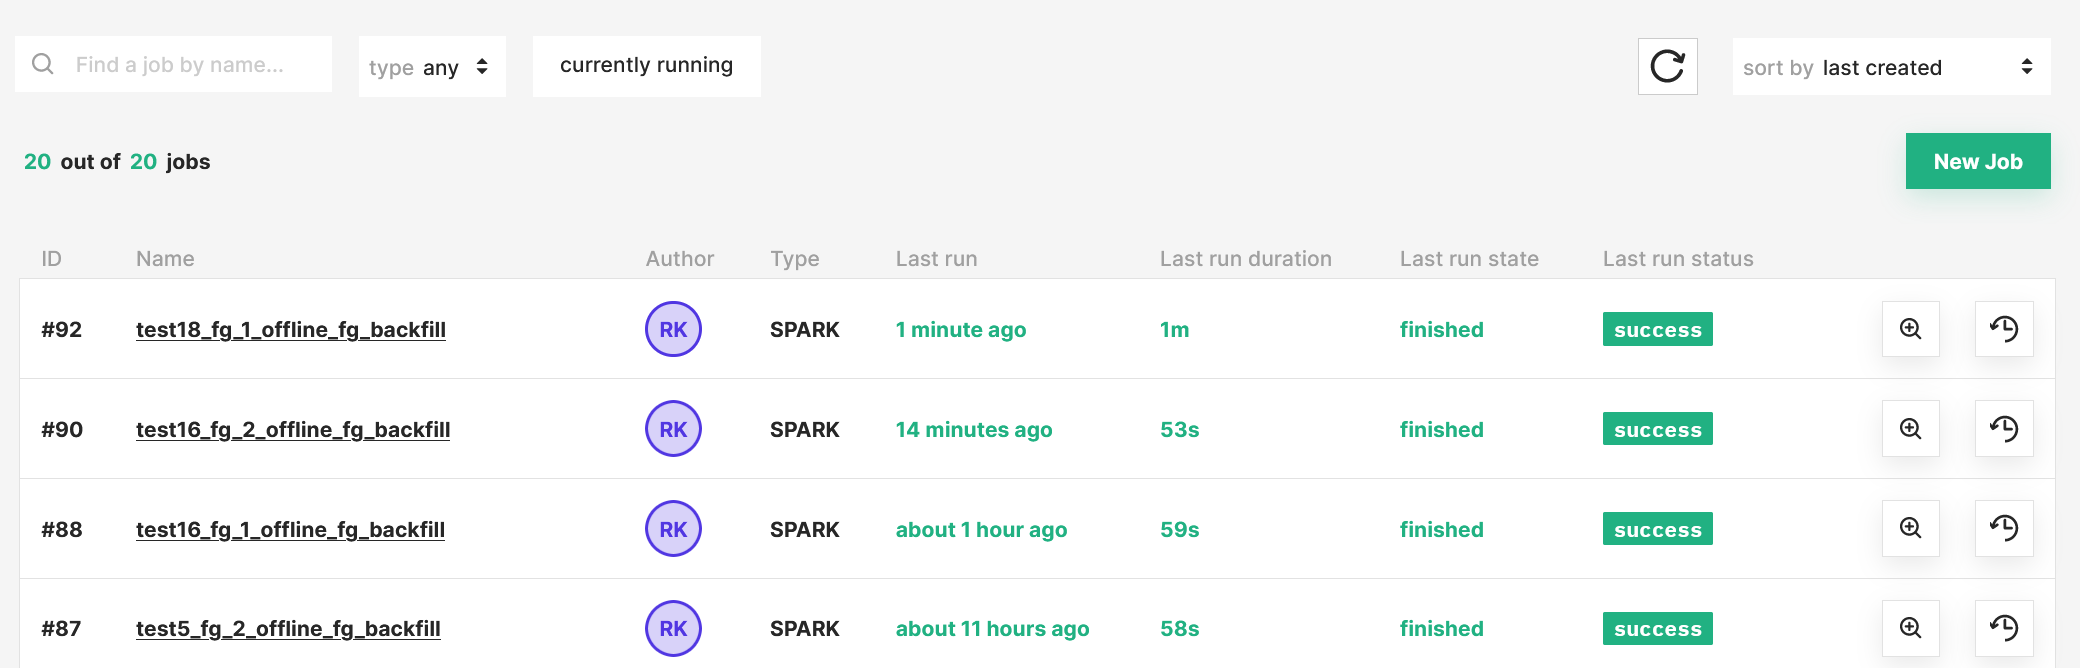

In [17]:
test18_fg.delete()

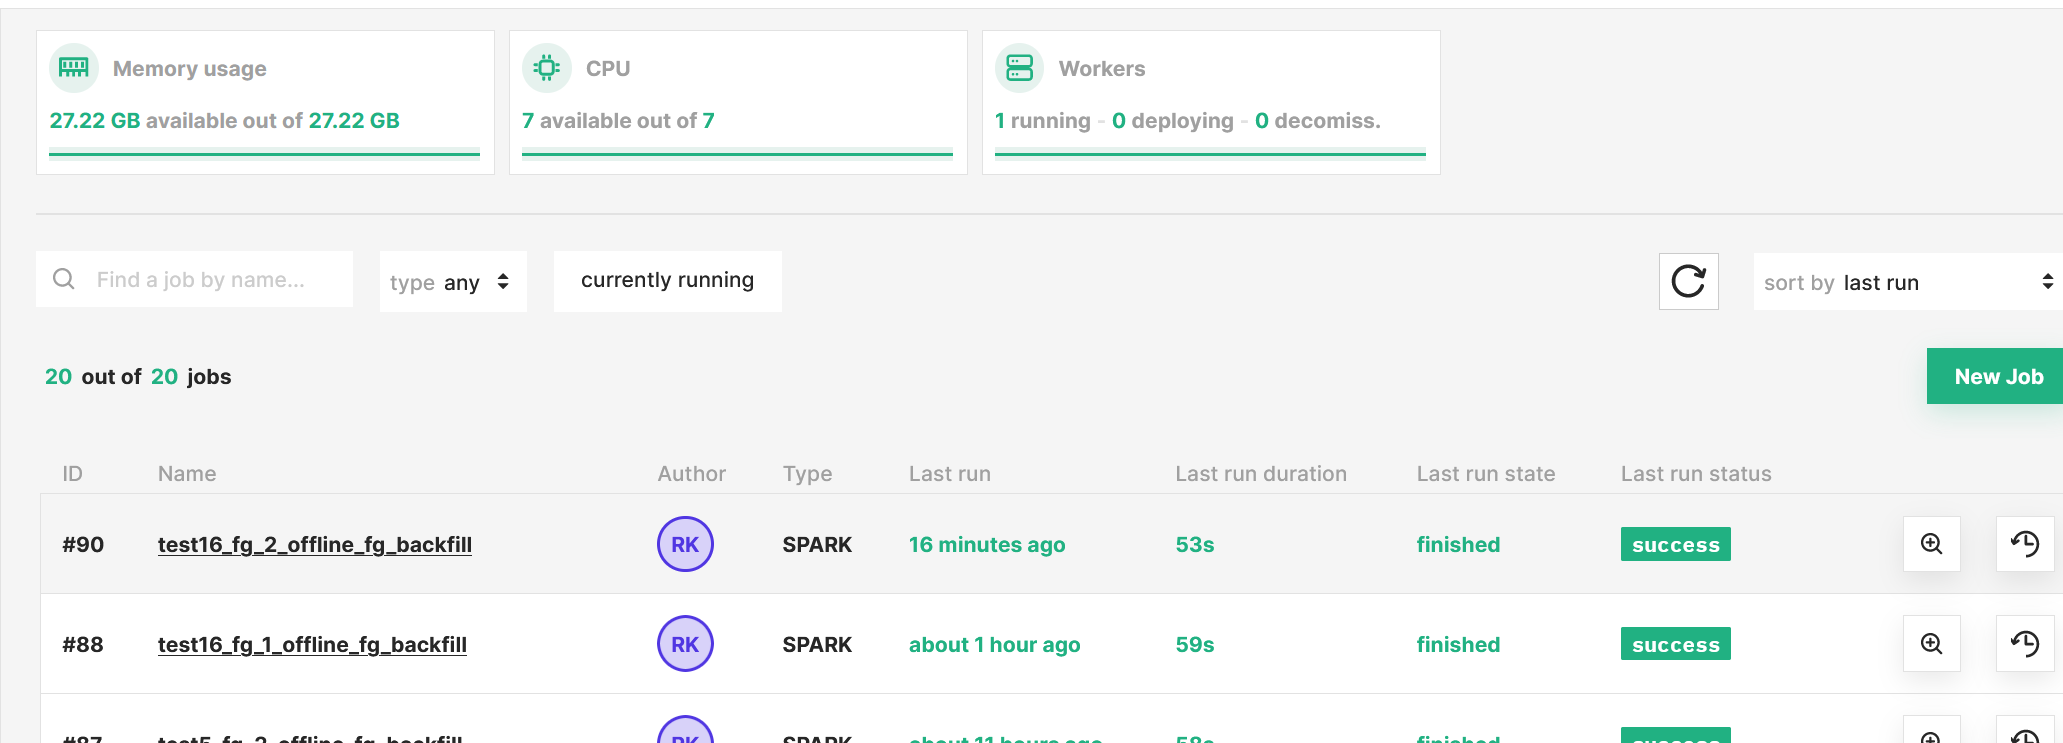

Job about FG `test18` creation just dissappered. 

Also, there are 26 jobs in that Jobs list (section), but it shows that there are only 20 (look at the screenshot)

## 19) a) Retrieve all features of a feature group at a point in the past.

In [19]:
df19 = df.iloc[:5000, :5]
df19_to_be_added_rows1 = df.iloc[5000:10000, :5]
df19_to_be_added_rows2 = df.iloc[10000:15000, :5]
df19_to_be_added_rows3 = df.iloc[15000:20000, :5]

In [20]:
test19_fg = fs.create_feature_group(name="test19_fg",
                                   version=1,
                                   primary_key=["ride_id"],   
                                   description="test19_fg")   
test19_fg.save(df19)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test19_fg_1_offline_fg_backfill/executions


In [21]:
test19_fg.insert(df19_to_be_added_rows1)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test19_fg_1_offline_fg_backfill/executions


In [22]:
test19_fg.insert(df19_to_be_added_rows2)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test19_fg_1_offline_fg_backfill/executions


In [23]:
test19_fg.insert(df19_to_be_added_rows3)

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at https://hopsworks.glassfish.service.consul:8182/p/123/jobs/named/test19_fg_1_offline_fg_backfill/executions
